In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

fn = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        fn.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


In [2]:
import pandas as pd
df = pd.read_csv(fn[0])
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


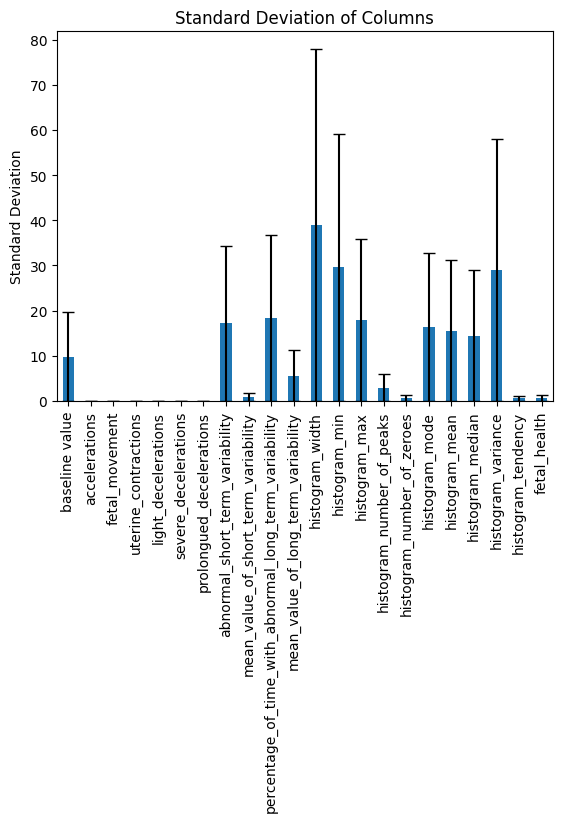

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

std_devs = df.std()

std_devs.plot(kind='bar', yerr=std_devs, capsize=4, title='Standard Deviation of Columns')
plt.ylabel('Standard Deviation')
plt.show()

In [6]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
X=df.drop(['fetal_health'],axis=1)
y=df['fetal_health']

Text(0.5, 1.0, 'Number of samples of each class')

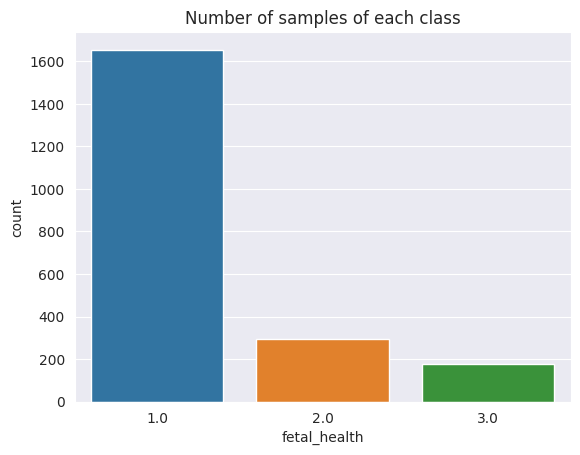

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
sns.countplot(data=df,x='fetal_health')
plt.title("Number of samples of each class")

<Axes: >

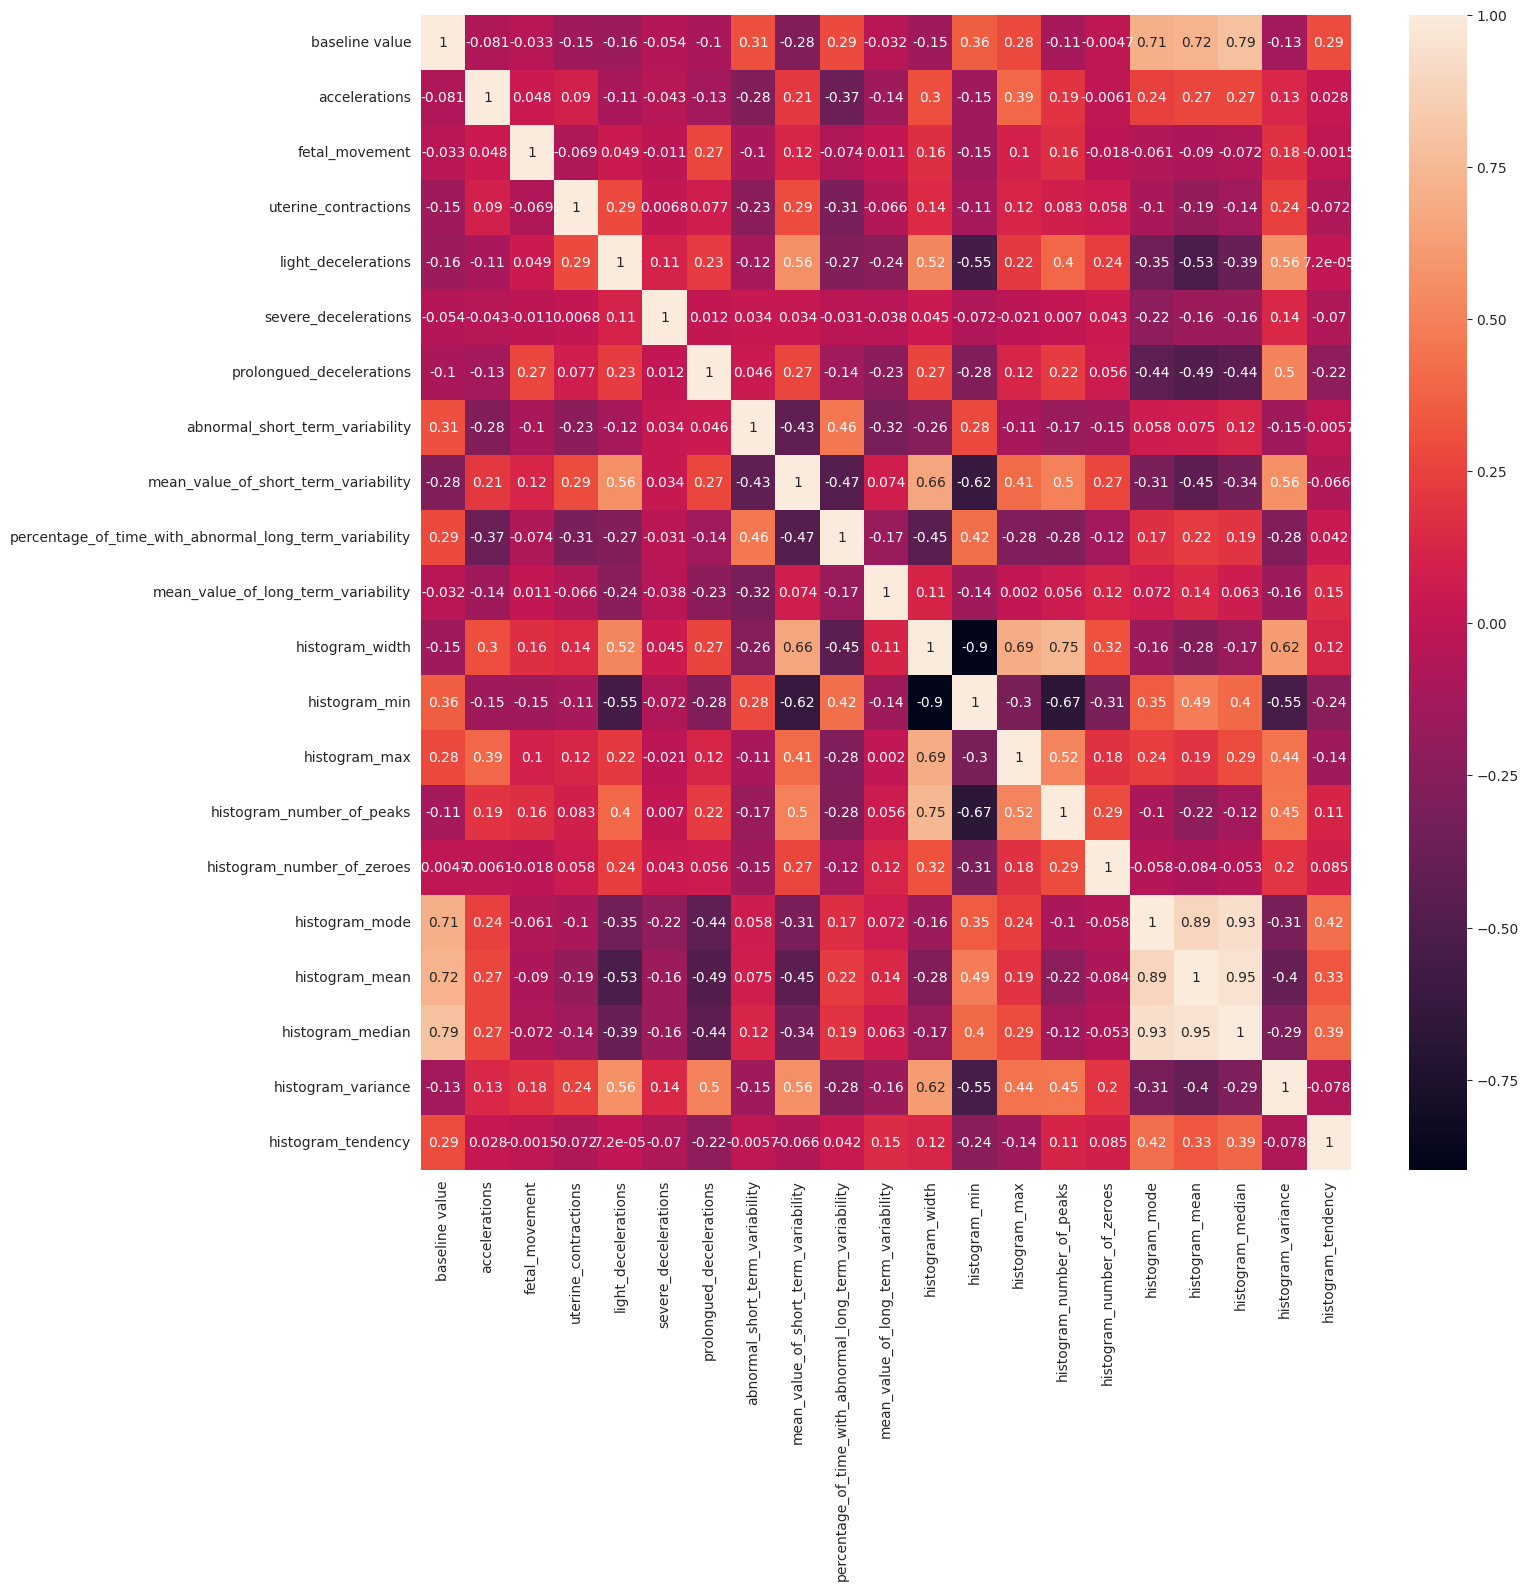

In [9]:
corr=X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

In [10]:
grouped=df.groupby(by='fetal_health').mean()
grouped.transpose()

fetal_health,1.0,2.0,3.0
baseline value,1.319819e+02,141.684746,131.687500
accelerations,3.992145e-03,0.000275,0.000392
fetal_movement,7.963142e-03,0.008332,0.025676
uterine_contractions,4.780665e-03,0.002390,0.003784
light_decelerations,1.941390e-03,0.000536,0.003670
severe_decelerations,6.042296e-07,0.000000,0.000034
prolongued_decelerations,5.135952e-05,0.000095,0.001273
abnormal_short_term_variability,4.246586e+01,61.901695,64.539773
mean_value_of_short_term_variability,1.430634e+00,0.638983,1.575568
percentage_of_time_with_abnormal_long_term_variability,5.044713e+00,29.030508,22.846591


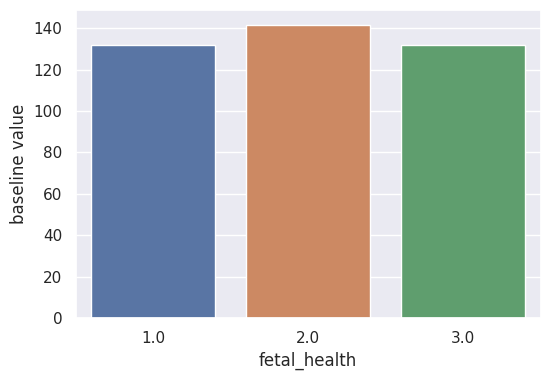

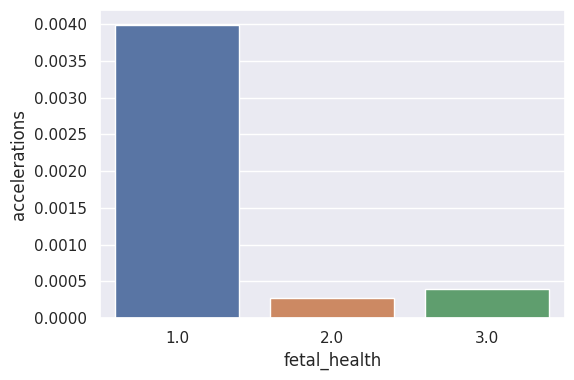

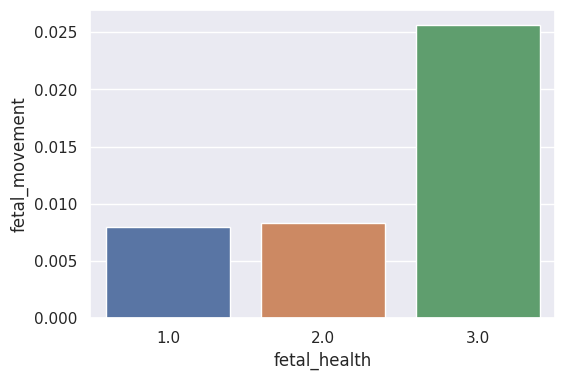

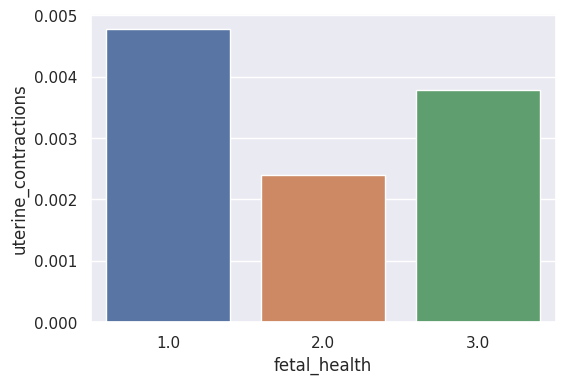

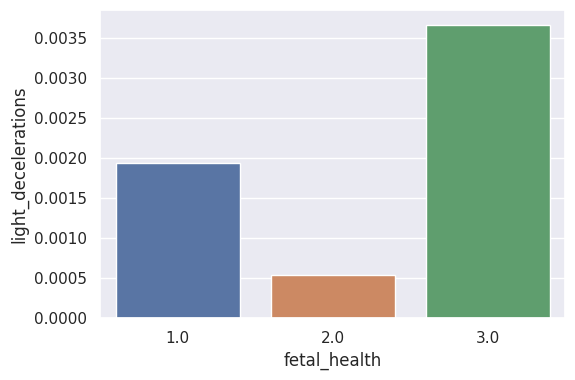

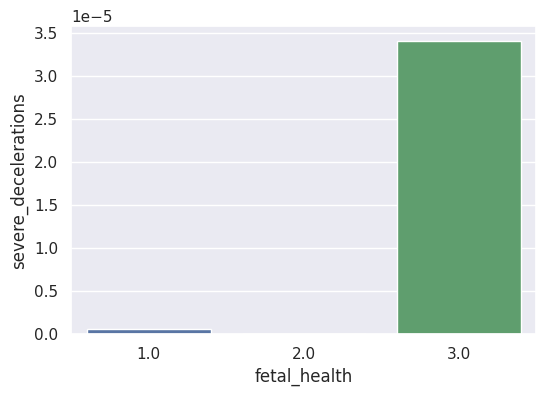

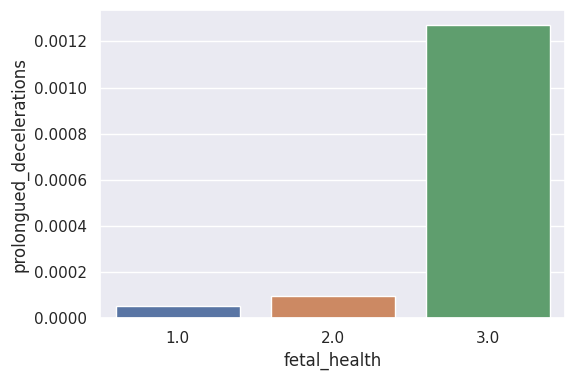

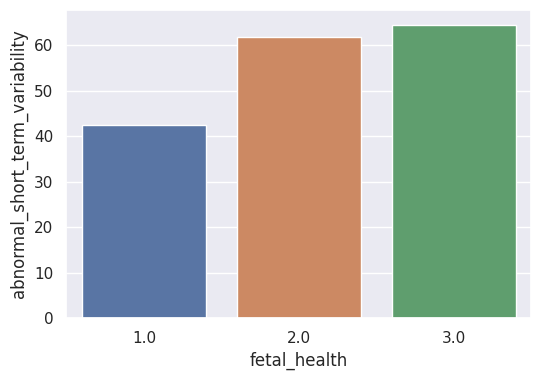

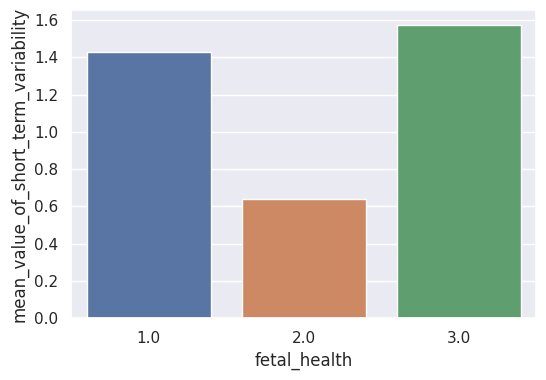

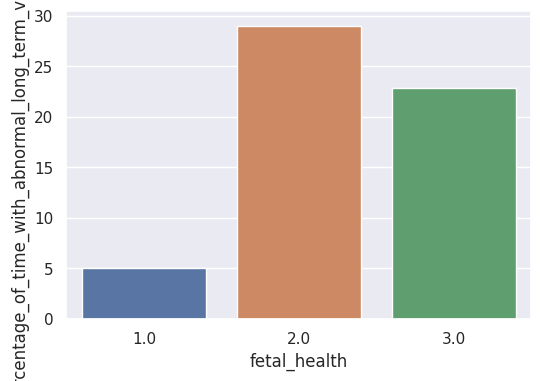

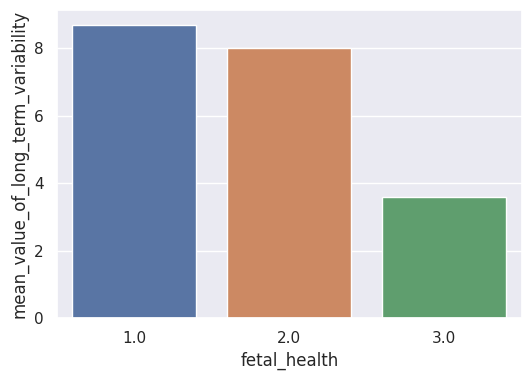

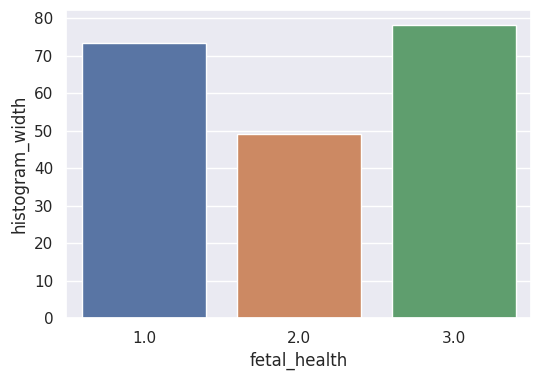

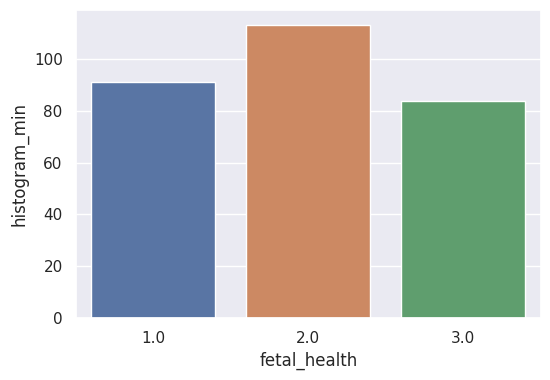

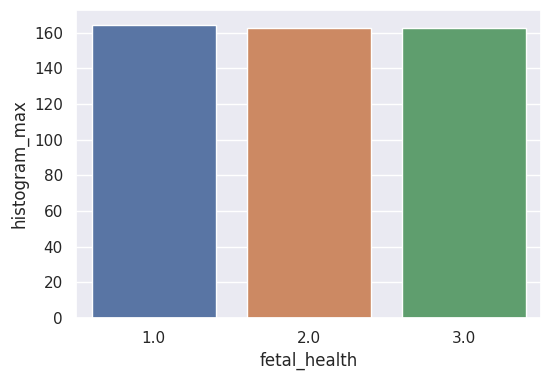

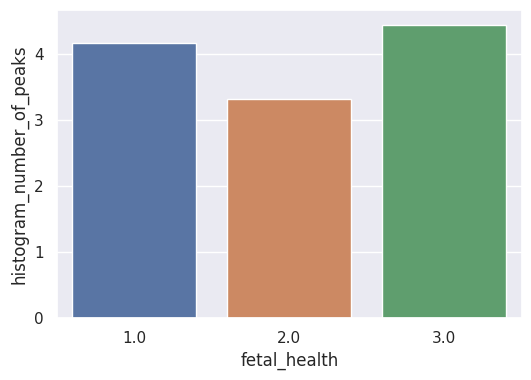

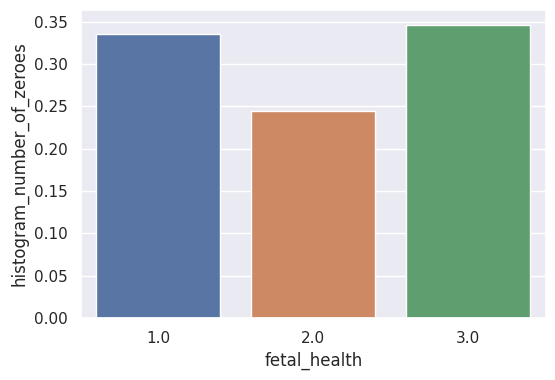

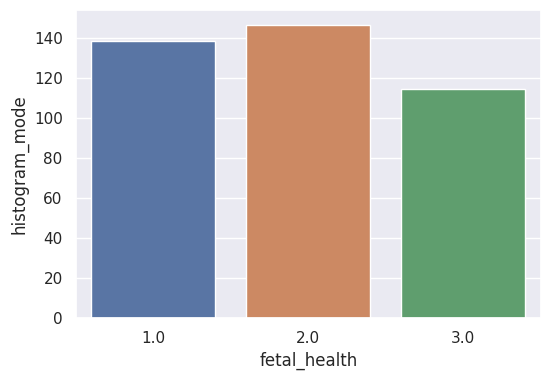

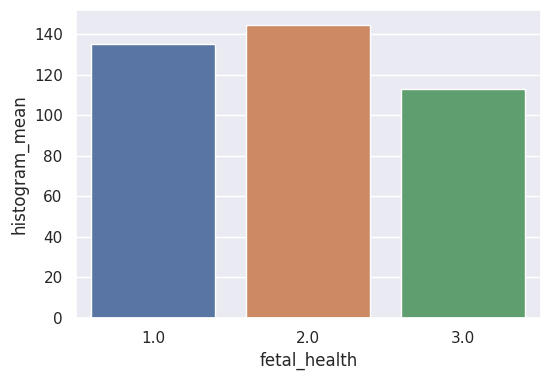

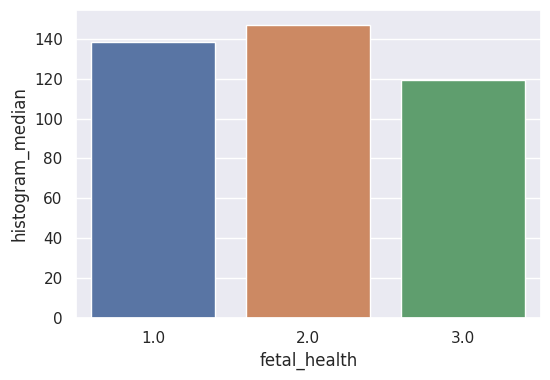

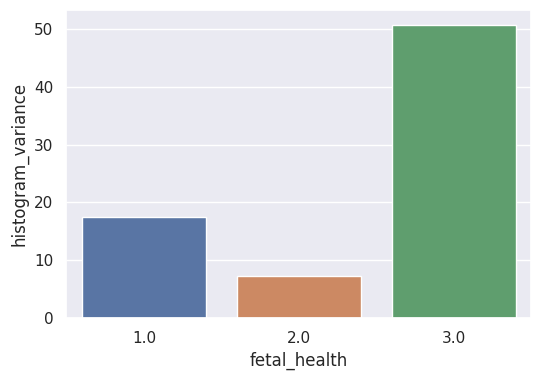

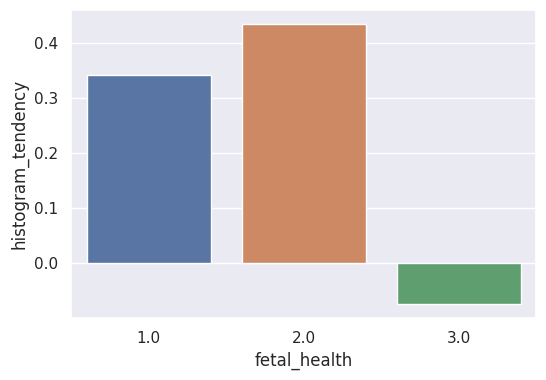

In [11]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
for index,i in enumerate(grouped.columns,start=1):
    plt.figure(figsize=(6,4))
    sns.barplot(data=grouped,x=grouped.index,y=grouped[i])
    plt.show()

In [12]:
# Import necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'target' is the name of the target column
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())

Before SMOTE: fetal_health
1.0    1322
2.0     231
3.0     147
Name: count, dtype: int64
After SMOTE: fetal_health
1.0    1322
2.0    1322
3.0    1322
Name: count, dtype: int64


<Axes: xlabel='fetal_health', ylabel='count'>

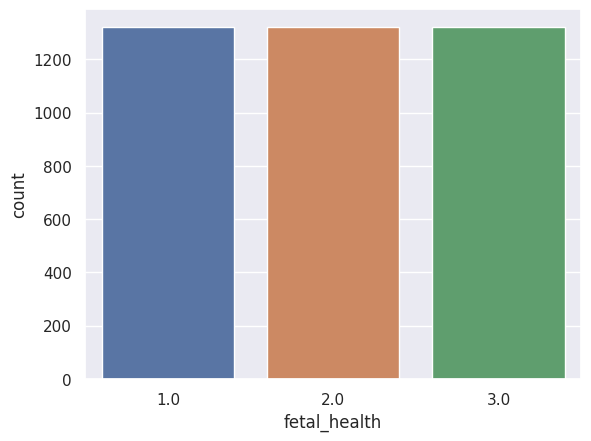

In [13]:
sns.countplot(data=pd.DataFrame(y_train_resampled),x='fetal_health')

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_train_resampled)

In [15]:
X_scaled=pd.DataFrame(X_scaled,columns=X_train_resampled.columns)
X_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.012969,-0.530027,-0.260903,1.425385,-0.657159,-0.115509,-0.497407,-1.448300,-0.140504,-0.604430,...,-0.374098,-0.001372,-0.908387,-0.010909,-0.452268,-0.321982,-0.276642,-0.419398,-0.563195,-0.333567
1,0.496078,-0.530027,-0.260903,-0.901606,-0.657159,-0.115509,-0.497407,0.235844,-0.443948,0.546796,...,1.200124,-0.508136,1.964299,1.622668,-0.452268,0.346789,0.480896,0.380299,-0.538434,-0.333567
2,-1.314779,-0.530027,-0.260903,-1.234033,-0.338436,-0.115509,-0.497407,-2.170076,0.567533,-0.723522,...,-0.647876,0.207295,-1.184607,-0.991055,-0.452268,-0.589490,-0.560719,-0.739276,-0.538434,-0.333567
3,0.194269,1.148673,-0.260903,0.428103,-0.019714,-0.115509,-0.497407,-1.207708,-0.342800,-0.723522,...,-0.100320,0.565011,0.804176,-0.010909,-0.452268,0.658882,0.812318,0.753490,-0.389864,-0.333567
4,0.697285,0.477193,-0.260903,0.095676,-0.657159,-0.115509,-0.497407,-0.606228,-0.545096,0.348309,...,-0.944469,1.101584,-0.245459,-0.991055,-0.452268,0.748051,0.812318,0.806804,-0.587957,-0.333567


In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3) #getting 3 components with highest variance
X_pca=pca.fit_transform(X_scaled)
X_pca=pd.DataFrame(X_pca)
X_pca.head()

,0,1,2
0,0.121876,0.223842,2.363335
1,-0.264374,1.420201,-1.611269
2,-0.030947,-0.381410,2.626144
3,-0.700483,1.598484,0.574157
4,-2.338562,0.248143,0.440497


In [17]:
import plotly.express as px
fig = px.scatter_3d(X_pca, x=0, y=1, z=2,
              color=y_train_resampled, size_max=10)
fig.show()

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95) #0.95 here refers that the total variance explained by the components must be atleast 95%
X_pca_final=pca.fit_transform(X_scaled)
X_pca_final=pd.DataFrame(X_pca_final)
X_pca_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.121876,0.223842,2.363180,0.617722,-0.639487,-0.347519,1.210504,0.182475,-0.775681,-0.442078,-0.132972,-0.782094,-0.444575
1,-0.264375,1.420202,-1.611240,0.561988,0.446625,0.674914,-1.071819,1.226722,-1.546680,-0.996913,0.113142,-0.584969,-0.453638
2,-0.030947,-0.381410,2.626351,1.644011,-1.053259,0.415229,0.707662,0.830565,-0.389848,-0.045922,-0.851939,1.477242,-0.704306
3,-0.700483,1.598484,0.573929,-1.467060,-0.702892,0.538401,-0.086486,-0.091162,0.056503,-0.242021,0.312071,0.328836,-0.477368
4,-2.338562,0.248143,0.440606,-1.051233,-0.638142,0.414477,0.500351,-0.103517,0.248616,-0.087563,-0.208667,0.197063,-0.265748


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca_final,y_train_resampled,random_state=42,stratify=y_train_resampled)

Best Parameters: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9172820643408878
Test Accuracy: 0.9344758064516129


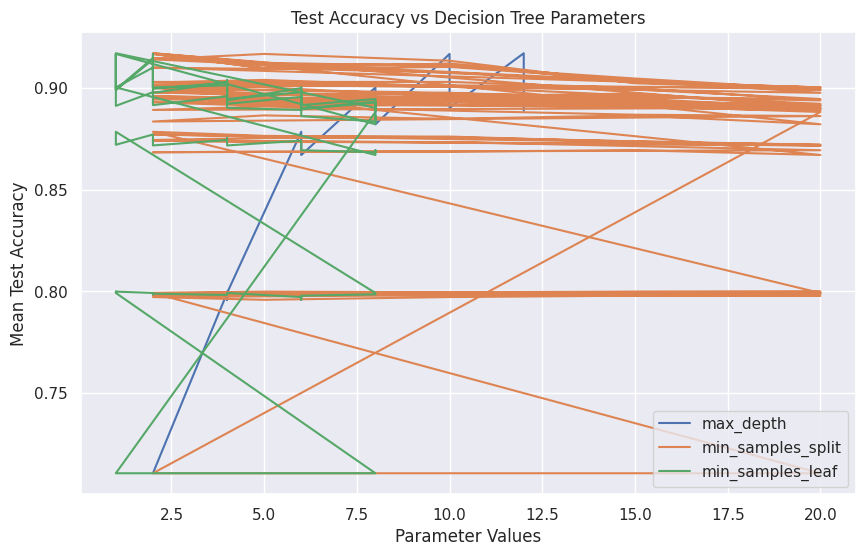

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the parameter grid
param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Plotting test accuracy vs parameters
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# Extracting parameter values
param_combinations = [params for params in results['params']]
param_names = list(param_grid.keys())

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for param_name in param_names:
    param_values = [params[param_name] for params in param_combinations]
    ax.plot(param_values, mean_test_scores, label=param_name)

ax.set_xlabel('Parameter Values')
ax.set_ylabel('Mean Test Accuracy')
ax.set_title('Test Accuracy vs Decision Tree Parameters')
ax.legend()
plt.show()

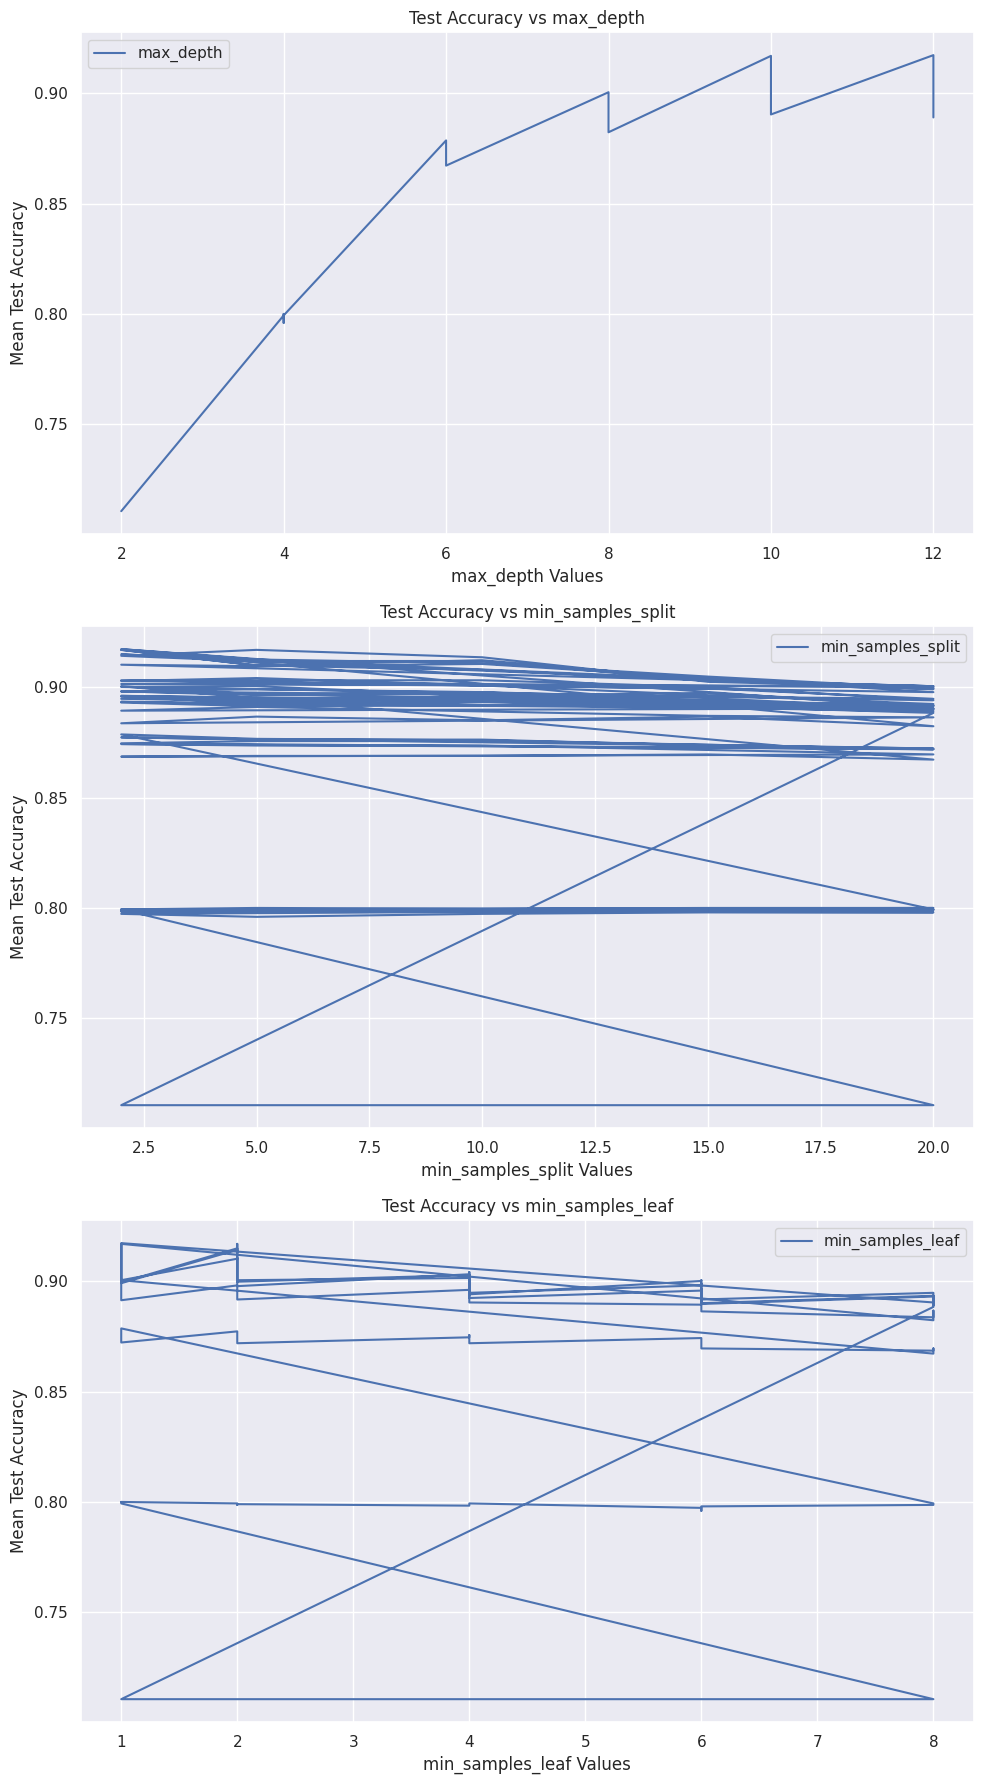

In [21]:
import matplotlib.pyplot as plt

# Plotting test accuracy vs parameters
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# Extracting parameter values
param_combinations = [params for params in results['params']]
param_names = list(param_grid.keys())

# Creating subplots
fig, axes = plt.subplots(len(param_names), 1, figsize=(10, 6 * len(param_names)))

# Plotting each parameter separately
for i, param_name in enumerate(param_names):
    param_values = [params[param_name] for params in param_combinations]
    axes[i].plot(param_values, mean_test_scores, label=param_name)
    axes[i].set_xlabel(f'{param_name} Values')
    axes[i].set_ylabel('Mean Test Accuracy')
    axes[i].set_title(f'Test Accuracy vs {param_name}')
    axes[i].legend()

plt.tight_layout()
plt.show()


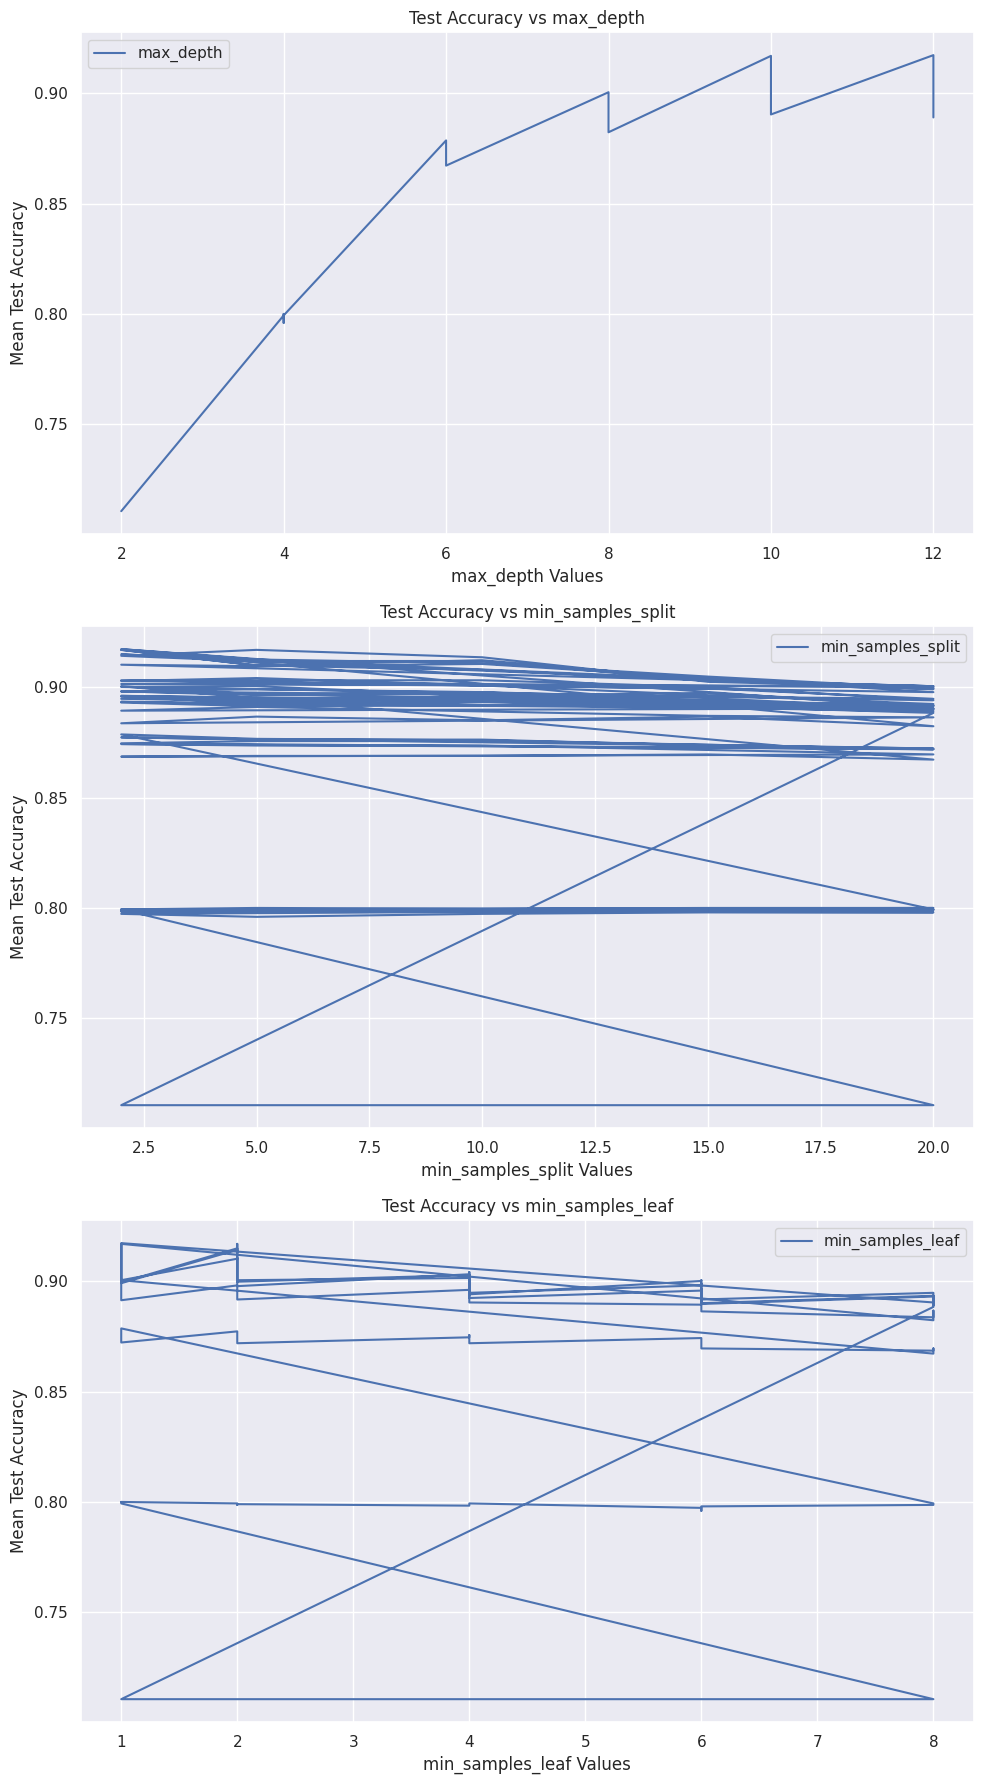

In [22]:
import matplotlib.pyplot as plt

# Plotting test accuracy vs parameters
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# Extracting parameter values
param_combinations = [params for params in results['params']]
param_names = list(param_grid.keys())

# Creating subplots
fig, axes = plt.subplots(len(param_names), 1, figsize=(10, 6 * len(param_names)))

# Plotting each parameter separately
for i, param_name in enumerate(param_names):
    param_values = [params[param_name] for params in param_combinations]
    axes[i].plot(param_values, mean_test_scores, label=param_name)
    axes[i].set_xlabel(f'{param_name} Values')
    axes[i].set_ylabel('Mean Test Accuracy')
    axes[i].set_title(f'Test Accuracy vs {param_name}')
    axes[i].legend()

plt.tight_layout()
plt.show()
